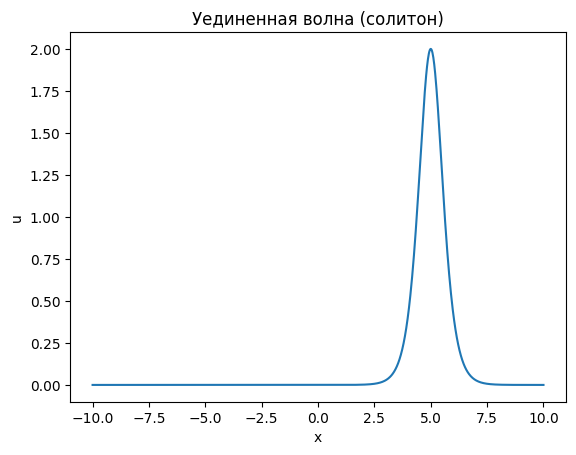

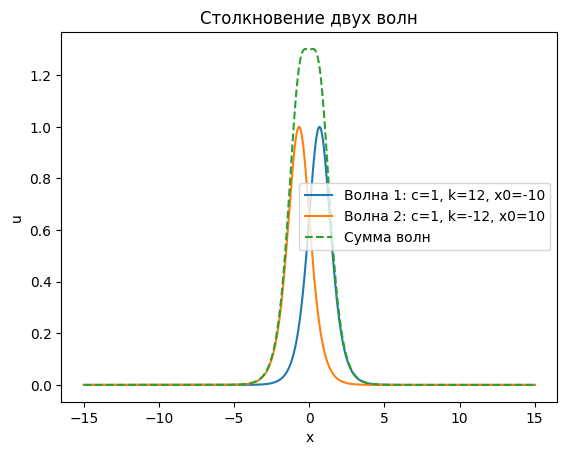

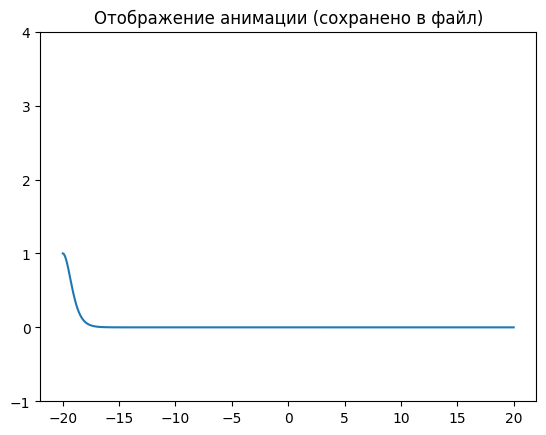

In [47]:
# Чепурной Григорий ИДМ-23-06 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ручная реализация функции гиперболического косинуса
# cosh(x) = (e^x + e^(-x)) / 2
def cosh(x):
    return (np.exp(x) + np.exp(-x)) / 2

# Функция для аналитического решения уравнения Кортвега-де Фриза (KdV) для солитона
def u(x, t, c, k, x0):
    return c / (cosh(np.sqrt(c) * (x - k * t - x0)) ** 2)

# 1. Случай "уединенной волны"
def plot_soliton():
    x = np.linspace(-10, 10, 1000) #  Пространственная координата
    t = 1 # Временная координата
    c = 2  # Амплитуда и ширина волны
    k = 5  # Направление и скорость волны
    x0 = 0 # Начальное положение волны

    # Отображение графика
    plt.figure()
    plt.plot(x, u(x, t, c, k, x0))
    plt.title("Уединенная волна (солитон)")
    plt.xlabel("x")
    plt.ylabel("u")
    plt.show()

# 2. Столкновение двух волн
def plot_collision():
    x = np.linspace(-15, 15, 1000)
    t = 0.89

    # Параметры первой волны
    c1, k1, x01 = 1, 12, -10
    # Параметры второй волны
    c2, k2, x02 = 1, -12, 10

    wave1 = u(x, t, c1, k1, x01)
    wave2 = u(x, t, c2, k2, x02)
    
    plt.figure()
    plt.plot(x, wave1, label=f"Волна 1: c={c1}, k={k1}, x0={x01}")
    plt.plot(x, wave2, label=f"Волна 2: c={c2}, k={k2}, x0={x02}")
    plt.plot(x, wave1 + wave2, label="Сумма волн", linestyle='--')
    plt.title("Столкновение двух волн")
    plt.xlabel("x")
    plt.ylabel("u")
    plt.legend()
    plt.show()

# 3. Анимация столкновения двух волн
def animate_collision():
    x = np.linspace(-20, 20, 1000)
    fig, ax = plt.subplots()
    ax.set_ylim(-1, 4)  # Установка ограничений для оси Y
    line, = ax.plot(x, u(x, 0, 1, 0.5, -20) + u(x, 0, 3, 1.5, -40))
    
    # Анимация волн
    def animate(t):
        # Первая волна: медленнее и меньше
        wave1 = u(x, t * 0.1, 1, 0.5, -20)
        # Вторая волна: быстрее и больше, начинает движение с задержкой
        wave2 = u(x, max(0, t - 20) * 0.1, 3, 1.5, -40)
        line.set_ydata(wave1 + wave2)
        return line,

    ani = FuncAnimation(fig, animate, frames=400, interval=10, blit=True)
    plt.title("Отображение анимации (сохранено в файл)")
    plt.show()
    ani.save('collision.mp4') # Сохраняем анимацию в видео файл

# Вызов функций
plot_soliton()
plot_collision()

# Вывод анимации
animate_collision()